In [10]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import pickle as pkl
from sklearn.model_selection import train_test_split

## Loading Data

In [11]:
#Load the data
with open('X.pkl', 'rb') as f:
    X = pkl.load(f)
with open('Y.pkl', 'rb') as f:
    Y = pkl.load(f)

#Convert to numpy arrays
X = np.array(X)
Y = np.array(Y)

#Split into training, testing, and validation sets using scikit-learn
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, shuffle=True)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, shuffle=True)

#Print the shapes and types of the data
print('X_train shape:', X_train.shape, 'type:', type(X_train))
print('Y_train shape:', Y_train.shape, 'type:', type(Y_train))
print('X_test shape:', X_test.shape, 'type:', type(X_test))
print('Y_test shape:', Y_test.shape, 'type:', type(Y_test))
print('X_val shape:', X_val.shape, 'type:', type(X_val))
print('Y_val shape:', Y_val.shape, 'type:', type(Y_val))

val_performance = {}
performance = {}

X_train shape: (310194, 12) type: <class 'numpy.ndarray'>
Y_train shape: (310194,) type: <class 'numpy.ndarray'>
X_test shape: (96936, 12) type: <class 'numpy.ndarray'>
Y_test shape: (96936,) type: <class 'numpy.ndarray'>
X_val shape: (77549, 12) type: <class 'numpy.ndarray'>
Y_val shape: (77549,) type: <class 'numpy.ndarray'>


In [15]:
Y_val

array([0.96651163, 0.34199016, 0.49116123, ..., 0.87144238, 0.4715948 ,
       0.13722633])

## Plotting Function

In [12]:
def plot(inputs, labels, model=None, max_subplots=3):
  plt.figure(figsize=(12, 8))
  max_n = min(max_subplots, len(inputs))
  for n in range(max_n):
    plt.subplot(max_n, 1, n+1)
    plt.ylabel(f'Energy Generation [normed]')
    plt.plot(inputs[n],
             label='Inputs', marker='.', zorder=-10)

    plt.scatter(x=len(inputs[n]), y=labels[n],
                edgecolors='k', label='Labels', c='#2ca02c', s=64)
    if model is not None:
      prediction = model(inputs[n])
      print(inputs[n])
      print(prediction)
      plt.scatter(x=len(inputs[n]), y=prediction,
                  marker='X', edgecolors='k', label='Predictions',
                  c='#ff7f0e', s=64)

    if n == 0:
      plt.legend()

  plt.xlabel('Time [Months]')

## Baseline Model

Just guess that the next data point is the same as the last data point.

In [13]:
class Baseline(tf.keras.Model):
  def __init__(self):
    super().__init__()

  def call(self, inputs):
    return inputs[-1]

In [18]:
baseline = Baseline()
baseline.compile(loss=tf.keras.losses.MeanSquaredError(),
                 metrics=["accuracy"])

print(baseline(X_test[0]))
print(Y_test[0])

val_performance = {}
performance = {}
performance['Baseline'] = baseline.evaluate(X_test, Y_test, verbose=0, batch_size=0)
#val_performance['Baseline'] = baseline.evaluate(X_val, Y_val, batch_size=0)


tf.Tensor(0.029953536, shape=(), dtype=float32)
0.008036314400101306


2023-05-04 10:53:34.578843: I tensorflow/core/common_runtime/executor.cc:1197] [/job:localhost/replica:0/task:0/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: Incompatible shapes: [32] vs. [12]
	 [[{{node mean_squared_error/SquaredDifference}}]]


InvalidArgumentError: Graph execution error:

Detected at node 'mean_squared_error/SquaredDifference' defined at (most recent call last):
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/runpy.py", line 194, in _run_module_as_main
      return _run_code(code, main_globals, None,
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/runpy.py", line 87, in _run_code
      exec(code, run_globals)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/ipykernel_launcher.py", line 17, in <module>
      app.launch_new_instance()
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/traitlets/config/application.py", line 992, in launch_instance
      app.start()
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/ipykernel/kernelapp.py", line 711, in start
      self.io_loop.start()
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/tornado/platform/asyncio.py", line 215, in start
      self.asyncio_loop.run_forever()
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/asyncio/base_events.py", line 570, in run_forever
      self._run_once()
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/asyncio/base_events.py", line 1859, in _run_once
      handle._run()
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/asyncio/events.py", line 81, in _run
      self._context.run(self._callback, *self._args)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 510, in dispatch_queue
      await self.process_one()
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 499, in process_one
      await dispatch(*args)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 406, in dispatch_shell
      await result
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/ipykernel/kernelbase.py", line 729, in execute_request
      reply_content = await reply_content
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/ipykernel/ipkernel.py", line 411, in do_execute
      res = shell.run_cell(
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/ipykernel/zmqshell.py", line 531, in run_cell
      return super().run_cell(*args, **kwargs)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3006, in run_cell
      result = self._run_cell(
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3061, in _run_cell
      result = runner(coro)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner
      coro.send(None)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3266, in run_cell_async
      has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3445, in run_ast_nodes
      if await self.run_code(code, result, async_=asy):
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/IPython/core/interactiveshell.py", line 3505, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/var/folders/0m/kh104v054nj9529192f5_0_00000gn/T/ipykernel_67672/3266810870.py", line 10, in <module>
      performance['Baseline'] = baseline.evaluate(X_test, Y_test, verbose=0, batch_size=0)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 2072, in evaluate
      tmp_logs = self.test_function(iterator)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1852, in test_function
      return step_function(self, iterator)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1836, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1824, in run_step
      outputs = model.test_step(data)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1790, in test_step
      self.compute_loss(x, y, y_pred, sample_weight)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/engine/training.py", line 1109, in compute_loss
      return self.compiled_loss(
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/engine/compile_utils.py", line 265, in __call__
      loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/losses.py", line 142, in __call__
      losses = call_fn(y_true, y_pred)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/losses.py", line 268, in call
      return ag_fn(y_true, y_pred, **self._fn_kwargs)
    File "/Users/elicarter/opt/miniconda3/envs/py38/lib/python3.8/site-packages/keras/losses.py", line 1470, in mean_squared_error
      return backend.mean(tf.math.squared_difference(y_pred, y_true), axis=-1)
Node: 'mean_squared_error/SquaredDifference'
Incompatible shapes: [32] vs. [12]
	 [[{{node mean_squared_error/SquaredDifference}}]] [Op:__inference_test_function_857]

[0.43370691 0.69074649 0.7273544  0.68563364 0.74261766 0.00314717
 0.49454179 0.49095838 0.6410072  0.71837251 0.00414429 0.00769135]
tf.Tensor(0.007691349, shape=(), dtype=float32)
[0.50940052 0.67155016 0.67647277 0.61370178 0.65602263 0.71747804
 0.73052883 0.5961175  0.48280484 0.78970514 0.94242338 0.76693266]
tf.Tensor(0.76693267, shape=(), dtype=float32)
[0.103708   0.08178834 0.05986868 0.03794902 0.02896871 0.0164156
 0.01590865 0.0154017  0.01489475 0.01438779 0.00270375 0.00393492]
tf.Tensor(0.003934917, shape=(), dtype=float32)


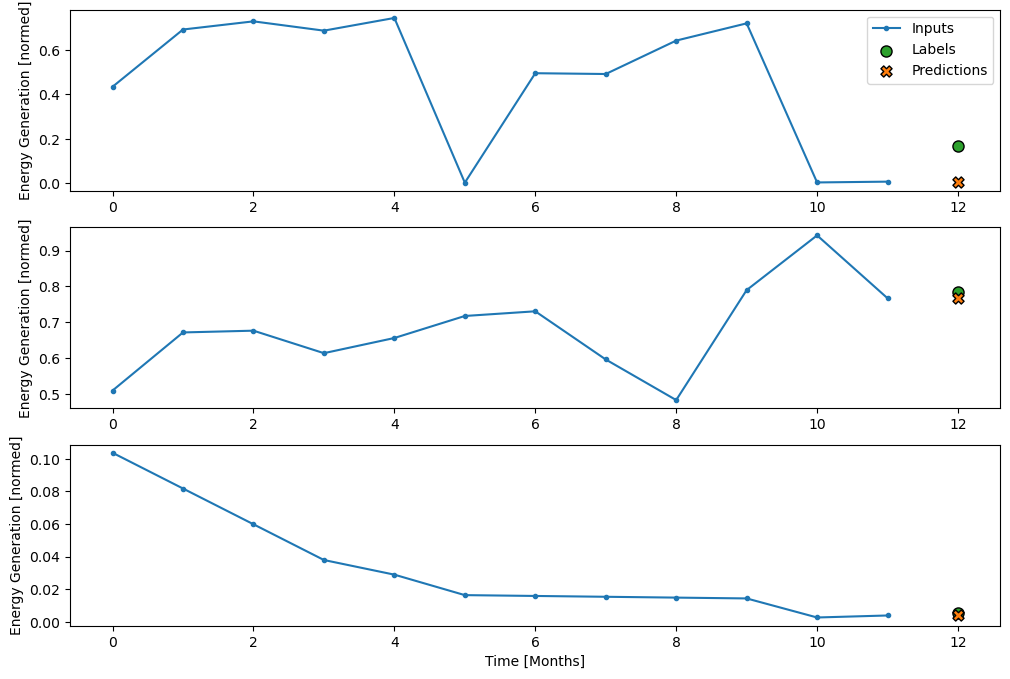

In [7]:
plot(inputs=X_val, labels=Y_val, model=baseline)